In [1]:
!git clone --recursive https://github.com/iamchaithanyak/Analysis-of-Meteorological-Data.git
%cd /content/Analysis-of-Meteorological-Data

Cloning into 'Analysis-of-Meteorological-Data'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 14 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (14/14), done.
/content/Analysis-of-Meteorological-Data


In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
custom_date_parser = lambda x: datetime.strptime(date_formatter(x), "%Y-%m-%d %H:%M:%S").strftime("%Y-%d-%m %H:%M:%S")
date_formatter = lambda x: str(x)[slice(19)]
df = pd.read_csv('weatherHistory.csv',parse_dates=['Formatted Date'],date_parser=custom_date_parser)
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], format="%Y-%d-%m %H:%M:%S")
df.set_index('Formatted Date', drop = True, inplace = True)
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,
2006-04-01 00:00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2006-04-01 02:00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
2006-04-01 03:00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
2006-04-01 04:00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [13]:
df =df.drop(columns = ['Summary', 'Precip Type', 'Temperature (C)', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Pressure (millibars)', 'Daily Summary'])

In [15]:
df.describe()

,Apparent Temperature (C),Humidity
count,96453.000000,96453.000000
mean,10.855029,0.734899
std,10.696847,0.195473
min,-27.716667,0.000000
25%,2.311111,0.600000
50%,12.000000,0.780000
75%,18.838889,0.890000
max,39.344444,1.000000


In [16]:
df.index

DatetimeIndex(['2006-04-01 00:00:00', '2006-04-01 01:00:00',
               '2006-04-01 02:00:00', '2006-04-01 03:00:00',
               '2006-04-01 04:00:00', '2006-04-01 05:00:00',
               '2006-04-01 06:00:00', '2006-04-01 07:00:00',
               '2006-04-01 08:00:00', '2006-04-01 09:00:00',
               ...
               '2016-09-09 14:00:00', '2016-09-09 15:00:00',
               '2016-09-09 16:00:00', '2016-09-09 17:00:00',
               '2016-09-09 18:00:00', '2016-09-09 19:00:00',
               '2016-09-09 20:00:00', '2016-09-09 21:00:00',
               '2016-09-09 22:00:00', '2016-09-09 23:00:00'],
              dtype='datetime64[ns]', name='Formatted Date', length=96453, freq=None)

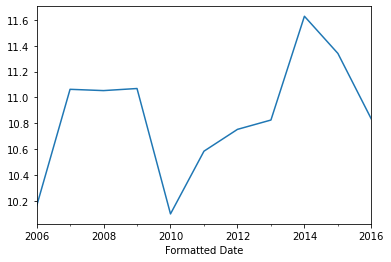

In [17]:
df['Apparent Temperature (C)'].resample('Y').mean().plot()

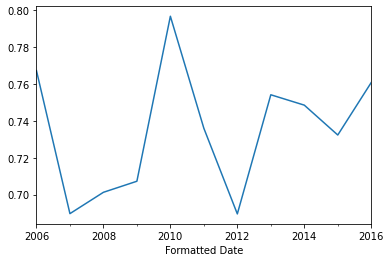

In [18]:
df['Humidity'].resample('Y').mean().plot()

In [19]:
df['Date'] = df.index

January


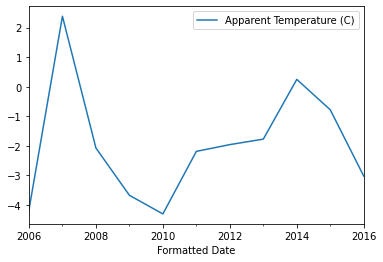

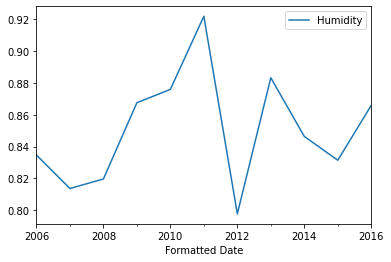

February


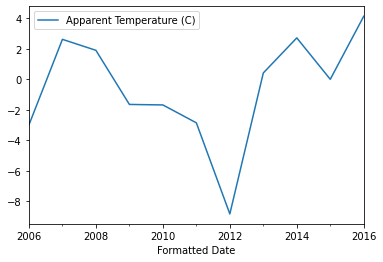

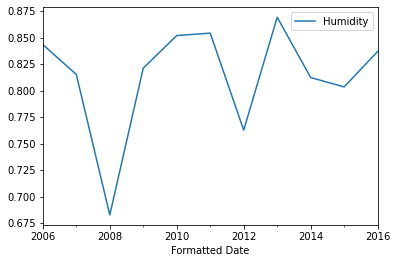

March


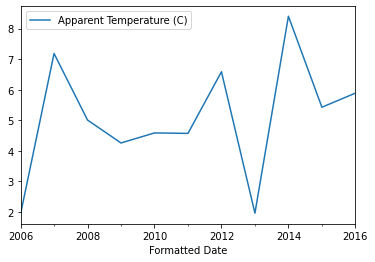

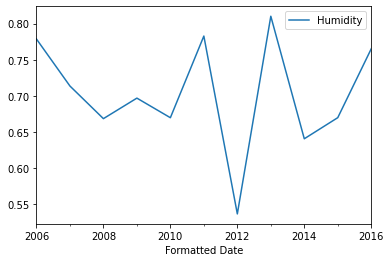

April


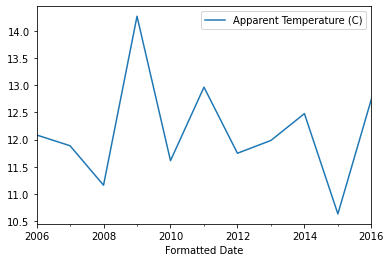

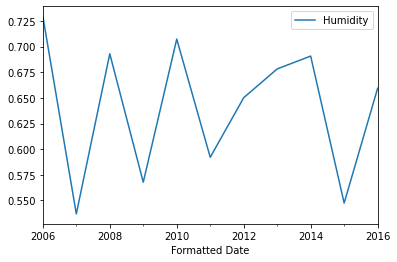

May


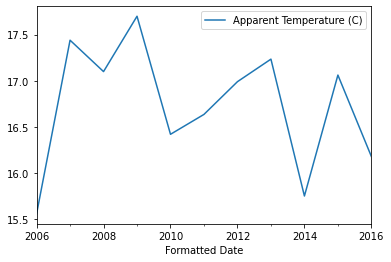

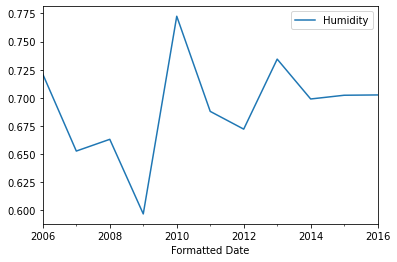

June


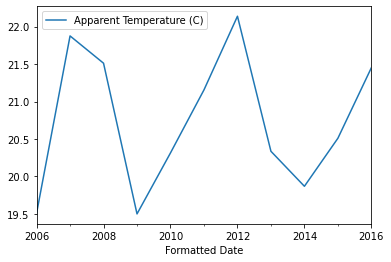

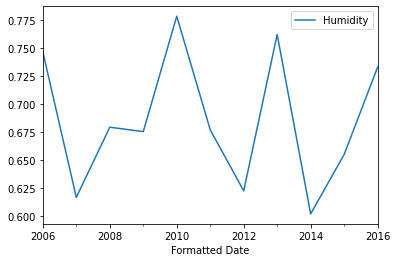

July


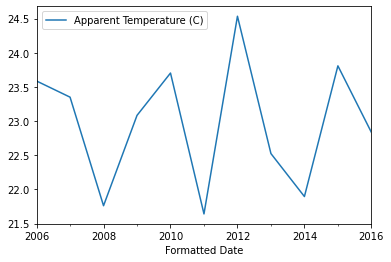

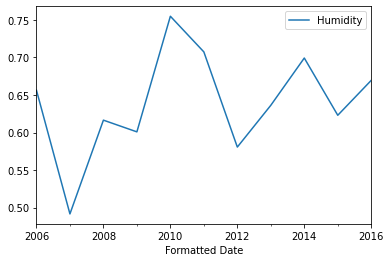

August


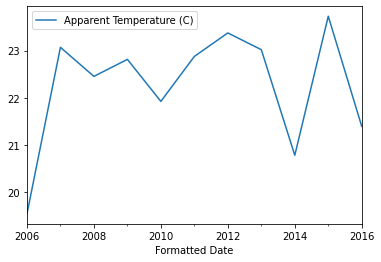

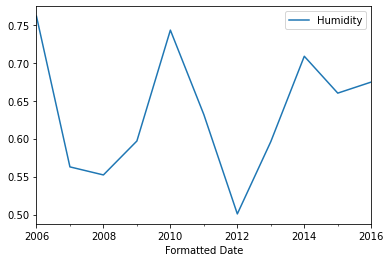

September


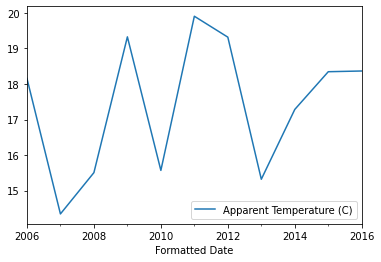

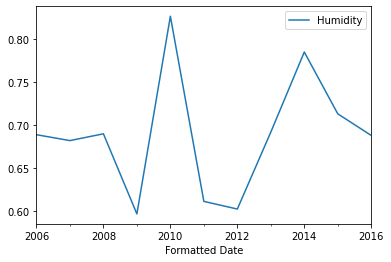

October


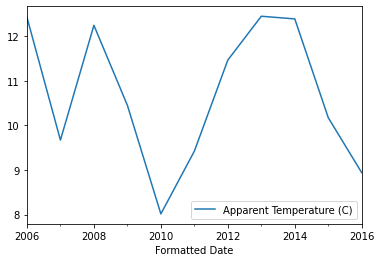

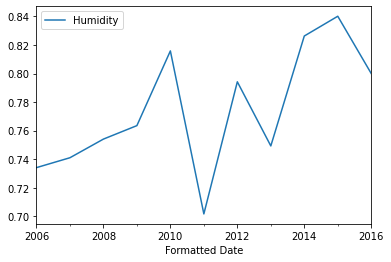

November


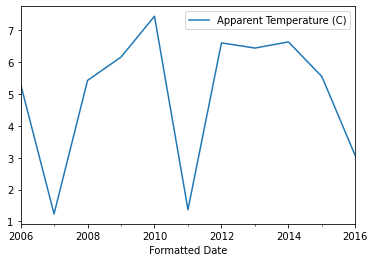

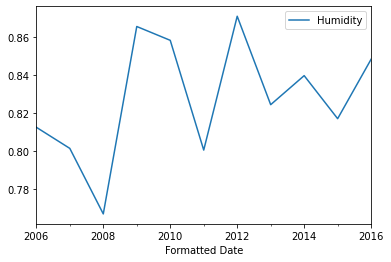

December


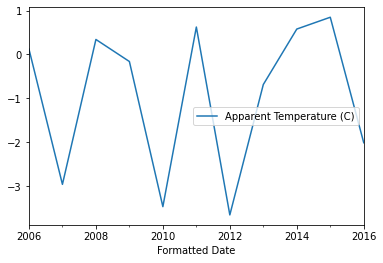

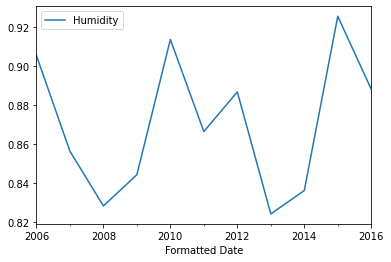

In [29]:
for i in range(12):
  df1 = df.loc[df['Date'].dt.month == i + 1, ['Apparent Temperature (C)', 'Date']]
  df2 = df.loc[df['Date'].dt.month == i + 1, ['Humidity', 'Date']]
  index = df1.index
  print(index[0].strftime("%B"))
  df1.resample('Y').mean().plot()  
  plt.show()
  df2.resample('Y').mean().plot()
  plt.show()

In [28]:
#df1.reset_index(drop=True,inplace = True)
#index[0]

'April'